In [1]:
# import the needed packages and check version
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle

print("tensorflow: ", tf.__version__) #1.14.0

tensorflow:  1.14.0


In [2]:
#import the fashion mnist dataset (from Zalando)
boston_housing = keras.datasets.boston_housing
data = boston_housing.load_data()
(train_x, train_y), (test_x, test_y) = data
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Data Analysis

Dataset taken from the StatLib library which is maintained at Carnegie Mellon University.

Samples contain 13 attributes of houses at different locations around the Boston suburbs in the late 1970s. Targets are the median values of the houses at a location (in k$).

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 - CRIM     per capita crime rate by town
 - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS    proportion of non-retail business acres per town
 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX      nitric oxides concentration (parts per 10 million)
 - RM       average number of rooms per dwelling
 - AGE      proportion of owner-occupied units built prior 
to 1940
 - DIS      weighted distances to five Boston employment centres
 - RAD      index of accessibility to radial highways
 - TAX      full-value property-tax rate per USD 10000
 - PTRATIO  pupil-teacher ratio by town
 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT    % lower status of the population
 - MEDV     Median value of owner-occupied homes in $1000's

In [100]:
df = pd.DataFrame(train_x)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [101]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [102]:
#data_train = pd.DataFrame(train_x)
#sns.pairplot(data_train)

In [103]:
print(train_x.shape)
print(test_x.shape)

(404, 13)
(102, 13)


# Preprocess the data

In [5]:
# check possible clusters for exclusion
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters = 6, random_state=0).fit(train_x)

In [10]:
cluster_train = kmeans.labels_

In [8]:
# check the distribution of the clusters
unique, counts = np.unique(cluster_train, return_counts=True)
print(unique, counts)

[0 1 2 3 4 5] [ 63  77  29  73 154   8]


In [11]:
# apply the same clustering to the test data
cluster_test = kmeans.predict(test_x)

In [10]:
# check the distribution of the clusters
unique, counts = np.unique(cluster_test, return_counts=True)
print(unique, counts)

[0 1 2 3 4 5] [17 26  5 14 37  3]


In [8]:
# save the clustering to be able to reproduce later
filename = 'A_101_kmeans.sav'

In [12]:
pickle.dump(kmeans, open(filename, 'wb'))

In [9]:
# load the kmeans
kmeans = pickle.load(open(filename, 'rb'))

In [14]:
kmeans.predict(test_x)

array([2, 3, 0, 3, 0, 3, 3, 4, 0, 1, 5, 4, 3, 0, 1, 4, 4, 3, 1, 1, 1, 2,
       4, 4, 4, 1, 4, 0, 2, 4, 3, 2, 0, 4, 1, 1, 3, 5, 1, 4, 0, 4, 1, 4,
       0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 3, 0, 1, 4, 0, 0, 1, 1, 2, 3, 4, 4,
       1, 4, 1, 1, 1, 4, 1, 1, 4, 4, 4, 4, 0, 1, 4, 4, 4, 1, 4, 4, 1, 4,
       4, 1, 0, 3, 4, 4, 0, 3, 4, 1, 3, 3, 4, 5])

# baseline neural network

In [15]:
model_nn = keras.Sequential([
    keras.layers.Dense(13, input_dim=13, kernel_initializer='normal', activation='sigmoid'),
    keras.layers.Dense(26),
    keras.layers.Dense(13),
    keras.layers.Dense(9),
    keras.layers.Dense(6),
    keras.layers.Dense(3),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(1, kernel_initializer='normal')
])

model_nn.compile(loss='mean_squared_error', optimizer='adam')

W1215 07:04:50.341538  6744 deprecation.py:506] From c:\users\annar\project_folder\venv\lib\site-packages\tensorflow\python\keras\initializers.py:143: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1215 07:04:50.347666  6744 deprecation.py:506] From c:\users\annar\project_folder\venv\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
history = model_nn.fit(train_x, train_y, epochs = 500)

Epoch 1/500
404/404 [==============================] - 1s 2ms/sample - loss: 582.7146
Epoch 2/500
404/404 [==============================] - 0s 64us/sample - loss: 570.1871
Epoch 3/500
404/404 [==============================] - 0s 144us/sample - loss: 541.3061
Epoch 4/500
404/404 [==============================] - 0s 120us/sample - loss: 482.1834
Epoch 5/500
404/404 [==============================] - 0s 81us/sample - loss: 369.9583
Epoch 6/500
404/404 [==============================] - 0s 69us/sample - loss: 205.3157
Epoch 7/500
404/404 [==============================] - 0s 70us/sample - loss: 90.8257
Epoch 8/500
404/404 [==============================] - 0s 104us/sample - loss: 90.7629
Epoch 9/500
404/404 [==============================] - 0s 91us/sample - loss: 82.8039
Epoch 10/500
404/404 [==============================] - 0s 121us/sample - loss: 79.9317
Epoch 11/500
404/404 [==============================] - 0s 132us/sample - loss: 77.4308
Epoch 12/500
404/404 [====================

404/404 [==============================] - 0s 71us/sample - loss: 14.4208
Epoch 96/500
404/404 [==============================] - 0s 94us/sample - loss: 14.1837
Epoch 97/500
404/404 [==============================] - 0s 72us/sample - loss: 14.3738
Epoch 98/500
404/404 [==============================] - 0s 72us/sample - loss: 14.2986
Epoch 99/500
404/404 [==============================] - 0s 101us/sample - loss: 14.4532
Epoch 100/500
404/404 [==============================] - 0s 91us/sample - loss: 14.2054
Epoch 101/500
404/404 [==============================] - 0s 83us/sample - loss: 20.2949
Epoch 102/500
404/404 [==============================] - 0s 70us/sample - loss: 14.4302
Epoch 103/500
404/404 [==============================] - 0s 70us/sample - loss: 16.1525
Epoch 104/500
404/404 [==============================] - 0s 68us/sample - loss: 14.7537
Epoch 105/500
404/404 [==============================] - 0s 59us/sample - loss: 16.5019
Epoch 106/500
404/404 [==========================

404/404 [==============================] - 0s 85us/sample - loss: 13.8835
Epoch 281/500
404/404 [==============================] - 0s 63us/sample - loss: 13.4015
Epoch 282/500
404/404 [==============================] - 0s 53us/sample - loss: 11.8891
Epoch 283/500
404/404 [==============================] - 0s 92us/sample - loss: 11.8849
Epoch 284/500
404/404 [==============================] - 0s 79us/sample - loss: 12.5432
Epoch 285/500
404/404 [==============================] - 0s 64us/sample - loss: 12.7432
Epoch 286/500
404/404 [==============================] - 0s 56us/sample - loss: 11.9203
Epoch 287/500
404/404 [==============================] - 0s 72us/sample - loss: 12.7864
Epoch 288/500
404/404 [==============================] - 0s 91us/sample - loss: 12.8048
Epoch 289/500
404/404 [==============================] - 0s 69us/sample - loss: 11.7807
Epoch 290/500
404/404 [==============================] - 0s 69us/sample - loss: 12.3703
Epoch 291/500
404/404 [=======================

Epoch 465/500
404/404 [==============================] - 0s 54us/sample - loss: 11.3570
Epoch 466/500
404/404 [==============================] - 0s 66us/sample - loss: 11.5019
Epoch 467/500
404/404 [==============================] - 0s 53us/sample - loss: 12.1801
Epoch 468/500
404/404 [==============================] - 0s 73us/sample - loss: 11.6492
Epoch 469/500
404/404 [==============================] - 0s 110us/sample - loss: 11.8532
Epoch 470/500
404/404 [==============================] - 0s 120us/sample - loss: 11.7473
Epoch 471/500
404/404 [==============================] - 0s 89us/sample - loss: 12.0769
Epoch 472/500
404/404 [==============================] - 0s 95us/sample - loss: 12.0466
Epoch 473/500
404/404 [==============================] - 0s 87us/sample - loss: 11.9597
Epoch 474/500
404/404 [==============================] - 0s 100us/sample - loss: 12.3409
Epoch 475/500
404/404 [==============================] - 0s 57us/sample - loss: 11.5500
Epoch 476/500
404/404 [======

In [17]:
# save the model
model_nn.save('A_101_baseline_nn.h5')

In [3]:
# load the model
model_nn = tf.keras.models.load_model('A_101_baseline_nn.h5')

W0105 21:13:41.243858  9512 deprecation.py:506] From c:\users\annar\project_folder\venv\lib\site-packages\tensorflow\python\keras\initializers.py:143: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0105 21:13:41.243858  9512 deprecation.py:506] From c:\users\annar\project_folder\venv\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0105 21:13:41.289613  9512 deprecation.py:506] From c:\users\annar\project_folder\venv\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_

In [4]:
# Check the training data

In [5]:
pred_test = model_nn.predict(train_x)

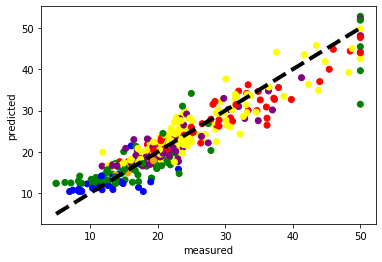

In [109]:
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'orange']
fig, ax = plt.subplots()
ax.scatter(train_y, pred_test, c = cluster_train, cmap=matplotlib.colors.ListedColormap(colors))
ax.plot([train_y.min(), train_y.max()], [train_y.min(), train_y.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [91]:
# check the predictions by the nn on the test data

In [22]:
pred = model_nn.predict(test_x)

In [23]:
diff = pred - test_y

In [24]:
((diff**2).sum())/train_x.shape[0] #989

3903.4358867437622

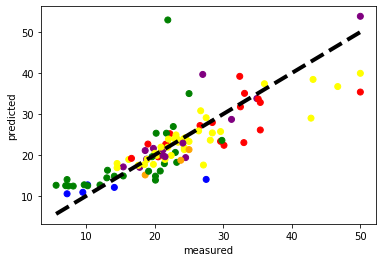

In [25]:
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'orange']
fig, ax = plt.subplots()
ax.scatter(test_y, pred, c = cluster_test, cmap=matplotlib.colors.ListedColormap(colors))
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

## Exclude one of the KMeans Clusters

In [12]:
train_x_mod = np.delete(train_x, np.where((cluster_train == 1))[0], axis = 0)

In [13]:
train_y_mod = np.delete(train_y, np.where((cluster_train == 1))[0], axis = 0)

In [14]:
cluster_train_mod = np.delete(cluster_train, np.where((cluster_train == 1))[0], axis = 0)

In [97]:
model_mc = keras.Sequential([
    keras.layers.Dense(13, input_dim=13, kernel_initializer='normal', activation='sigmoid'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(26),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(13),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(9),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(6),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3),
    keras.layers.Dropout(0.2),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(1, kernel_initializer='normal')
])

model_mc.compile(loss='mean_squared_error', optimizer='adam')

In [98]:
history = model_mc.fit(train_x_mod, train_y_mod, epochs = 500)

Epoch 1/500
327/327 [==============================] - 7s 21ms/sample - loss: 621.2288
Epoch 2/500
327/327 [==============================] - 0s 302us/sample - loss: 604.6121
Epoch 3/500
327/327 [==============================] - 0s 228us/sample - loss: 579.6009
Epoch 4/500
327/327 [==============================] - 0s 185us/sample - loss: 541.2993
Epoch 5/500
327/327 [==============================] - 0s 215us/sample - loss: 459.2424
Epoch 6/500
327/327 [==============================] - 0s 183us/sample - loss: 372.9976
Epoch 7/500
327/327 [==============================] - 0s 221us/sample - loss: 227.5472
Epoch 8/500
327/327 [==============================] - 0s 244us/sample - loss: 216.1236
Epoch 9/500
327/327 [==============================] - 0s 262us/sample - loss: 226.0163
Epoch 10/500
327/327 [==============================] - 0s 279us/sample - loss: 191.0461
Epoch 11/500
327/327 [==============================] - 0s 205us/sample - loss: 196.6641
Epoch 12/500
327/327 [=========

327/327 [==============================] - 0s 143us/sample - loss: 120.3093
Epoch 184/500
327/327 [==============================] - 0s 145us/sample - loss: 112.4254
Epoch 185/500
327/327 [==============================] - 0s 148us/sample - loss: 106.6810
Epoch 186/500
327/327 [==============================] - 0s 201us/sample - loss: 120.4289
Epoch 187/500
327/327 [==============================] - 0s 320us/sample - loss: 132.5938
Epoch 188/500
327/327 [==============================] - 0s 179us/sample - loss: 122.8167
Epoch 189/500
327/327 [==============================] - 0s 207us/sample - loss: 104.9346
Epoch 190/500
327/327 [==============================] - 0s 289us/sample - loss: 131.1683
Epoch 191/500
327/327 [==============================] - 0s 162us/sample - loss: 109.9848
Epoch 192/500
327/327 [==============================] - 0s 266us/sample - loss: 109.2733
Epoch 193/500
327/327 [==============================] - 0s 171us/sample - loss: 104.1855
Epoch 194/500
327/327 [=

327/327 [==============================] - 0s 226us/sample - loss: 98.6463
Epoch 275/500
327/327 [==============================] - 0s 170us/sample - loss: 101.0012
Epoch 276/500
327/327 [==============================] - 0s 173us/sample - loss: 91.9835
Epoch 277/500
327/327 [==============================] - 0s 158us/sample - loss: 83.4072
Epoch 278/500
327/327 [==============================] - 0s 171us/sample - loss: 94.6155
Epoch 279/500
327/327 [==============================] - 0s 283us/sample - loss: 108.7344
Epoch 280/500
327/327 [==============================] - 0s 251us/sample - loss: 104.4215
Epoch 281/500
327/327 [==============================] - 0s 198us/sample - loss: 113.6479
Epoch 282/500
327/327 [==============================] - 0s 214us/sample - loss: 112.1323
Epoch 283/500
327/327 [==============================] - 0s 171us/sample - loss: 98.9107
Epoch 284/500
327/327 [==============================] - 0s 289us/sample - loss: 99.4045
Epoch 285/500
327/327 [=======

327/327 [==============================] - 0s 194us/sample - loss: 86.0893
Epoch 457/500
327/327 [==============================] - 0s 153us/sample - loss: 88.0354
Epoch 458/500
327/327 [==============================] - 0s 161us/sample - loss: 79.3522
Epoch 459/500
327/327 [==============================] - 0s 318us/sample - loss: 77.0937
Epoch 460/500
327/327 [==============================] - 0s 277us/sample - loss: 81.0994
Epoch 461/500
327/327 [==============================] - 0s 201us/sample - loss: 84.2828
Epoch 462/500
327/327 [==============================] - 0s 222us/sample - loss: 67.6215
Epoch 463/500
327/327 [==============================] - 0s 200us/sample - loss: 80.7875
Epoch 464/500
327/327 [==============================] - 0s 194us/sample - loss: 79.3436
Epoch 465/500
327/327 [==============================] - 0s 259us/sample - loss: 85.9043
Epoch 466/500
327/327 [==============================] - 0s 213us/sample - loss: 77.6265
Epoch 467/500
327/327 [============

In [99]:
model_mc.save('A_101_mc.h5')

In [15]:
model_mc = tf.keras.models.load_model('A_101_mc.h5')

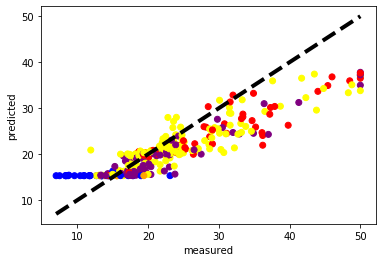

In [16]:
# with just the points seen during training
pred_test = model_mc.predict(train_x_mod)

colors = ['red', 'green', 'blue', 'purple', 'yellow', 'orange']
fig, ax = plt.subplots()
ax.scatter(train_y_mod, pred_test, c = cluster_train_mod, cmap=matplotlib.colors.ListedColormap(colors))
ax.plot([train_y_mod.min(), train_y_mod.max()], [train_y_mod.min(), train_y_mod.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

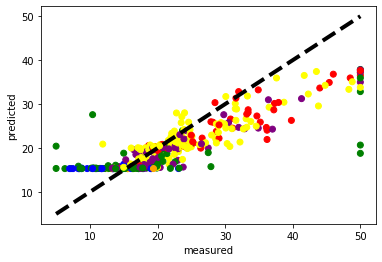

In [103]:
# with the unseen points during training
pred_test = model_mc.predict(train_x)

colors = ['red', 'green', 'blue', 'purple', 'yellow', 'orange']
fig, ax = plt.subplots()
ax.scatter(train_y, pred_test, c = cluster_train, cmap=matplotlib.colors.ListedColormap(colors))
ax.plot([train_y.min(), train_y.max()], [train_y.min(), train_y.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [104]:
# check the test dataset
pred = model_mc.predict(test_x)

In [105]:
diff = pred - test_y

In [106]:
((diff**2).sum())/train_x.shape[0] #989

2994.51035949349

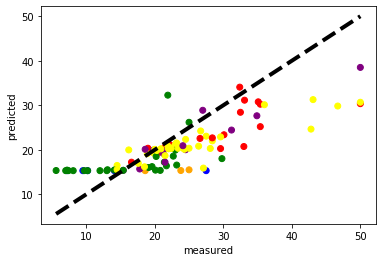

In [107]:
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'orange']
fig, ax = plt.subplots()
ax.scatter(test_y, pred, c = cluster_test, cmap=matplotlib.colors.ListedColormap(colors))
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

# create a prediction method to price in uncertainty

In [141]:
import tensorflow.keras.backend as K
model_mc_pred = K.function([model_mc.input, K.learning_phase()], [model_mc.output])

In [142]:
# set n for number of iterations:
n = 100
x = np.array(model_mc_pred([test_x, 1]))
for i in range(1, n, 1):
    y = np.array(model_mc_pred([test_x, 1]))
    x = np.concatenate([x,y], axis = 0)
pred_mean = x.mean(axis = 0)
pred_var = x.var(axis = 0)

# The variance is the average of the squared deviations from the mean, i.e., var = mean(abs(x - x.mean())**2).

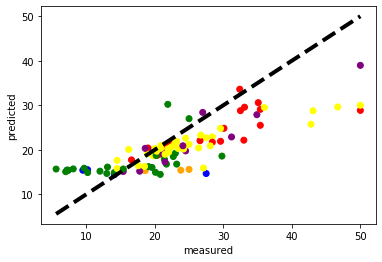

In [143]:
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'orange']
fig, ax = plt.subplots()
ax.scatter(test_y, pred_mean, c = cluster_test, cmap=matplotlib.colors.ListedColormap(colors))
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

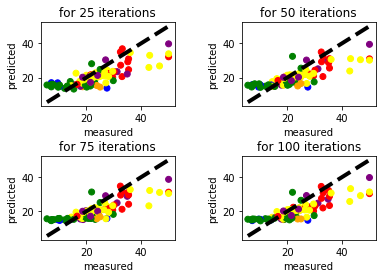

In [144]:
for i in range(25, 101, 25):
    n = i
    x = np.array(model_mc_pred([test_x, 1]))
    for j in range(1, n, 1):
        y = np.array(model_mc_pred([test_x, 1]))
        x = np.concatenate([x,y], axis = 0)
    pred_mean = x.mean(axis = 0)
    #plt.figure(figsize = [12,12])
    plt.subplot(2,2,i/25)
    plt.subplots_adjust(hspace = 0.6, wspace = 0.5)
    plt.scatter(test_y, pred_mean, c = cluster_test, cmap=matplotlib.colors.ListedColormap(colors))
    plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
    plt.xlabel('measured')
    plt.ylabel('predicted')
    plt.title('for ' + str(i) + ' iterations')
plt.show()

# loop through all the classes and see how they affect the model

Epoch 1/500
341/341 [==============================] - 2s 5ms/sample - loss: 526.4848
Epoch 2/500
341/341 [==============================] - 0s 247us/sample - loss: 523.2247
Epoch 3/500
341/341 [==============================] - 0s 202us/sample - loss: 517.7767
Epoch 4/500
341/341 [==============================] - 0s 156us/sample - loss: 505.6649
Epoch 5/500
341/341 [==============================] - 0s 131us/sample - loss: 486.7966
Epoch 6/500
341/341 [==============================] - 0s 162us/sample - loss: 445.9830
Epoch 7/500
341/341 [==============================] - 0s 106us/sample - loss: 374.9980
Epoch 8/500
341/341 [==============================] - 0s 115us/sample - loss: 271.7799
Epoch 9/500
341/341 [==============================] - 0s 277us/sample - loss: 227.3647
Epoch 10/500
341/341 [==============================] - 0s 130us/sample - loss: 219.8134
Epoch 11/500
341/341 [==============================] - 0s 131us/sample - loss: 199.0184
Epoch 12/500
341/341 [==========

341/341 [==============================] - 0s 119us/sample - loss: 85.8023
Epoch 185/500
341/341 [==============================] - 0s 123us/sample - loss: 98.6533
Epoch 186/500
341/341 [==============================] - 0s 123us/sample - loss: 106.6041
Epoch 187/500
341/341 [==============================] - 0s 131us/sample - loss: 74.9176
Epoch 188/500
341/341 [==============================] - 0s 131us/sample - loss: 91.0700
Epoch 189/500
341/341 [==============================] - 0s 118us/sample - loss: 83.3352
Epoch 190/500
341/341 [==============================] - 0s 97us/sample - loss: 90.3718
Epoch 191/500
341/341 [==============================] - 0s 150us/sample - loss: 92.9594
Epoch 192/500
341/341 [==============================] - 0s 166us/sample - loss: 93.9201
Epoch 193/500
341/341 [==============================] - 0s 153us/sample - loss: 89.0137
Epoch 194/500
341/341 [==============================] - 0s 118us/sample - loss: 99.2124
Epoch 195/500
341/341 [============

341/341 [==============================] - 0s 223us/sample - loss: 78.3188
Epoch 368/500
341/341 [==============================] - 0s 281us/sample - loss: 87.2257
Epoch 369/500
341/341 [==============================] - 0s 250us/sample - loss: 74.3410
Epoch 370/500
341/341 [==============================] - 0s 231us/sample - loss: 63.3034
Epoch 371/500
341/341 [==============================] - 0s 185us/sample - loss: 78.3441
Epoch 372/500
341/341 [==============================] - 0s 186us/sample - loss: 81.4835
Epoch 373/500
341/341 [==============================] - 0s 227us/sample - loss: 76.8522
Epoch 374/500
341/341 [==============================] - 0s 220us/sample - loss: 70.6054
Epoch 375/500
341/341 [==============================] - 0s 270us/sample - loss: 65.5213 - loss: 70.78
Epoch 376/500
341/341 [==============================] - 0s 230us/sample - loss: 81.7288
Epoch 377/500
341/341 [==============================] - 0s 290us/sample - loss: 85.9621
Epoch 378/500
341/341

341/341 [==============================] - 0s 344us/sample - loss: 64.1602
Epoch 460/500
341/341 [==============================] - 0s 186us/sample - loss: 67.3040
Epoch 461/500
341/341 [==============================] - 0s 344us/sample - loss: 72.4238
Epoch 462/500
341/341 [==============================] - 0s 166us/sample - loss: 67.7874
Epoch 463/500
341/341 [==============================] - ETA: 0s - loss: 63.27 - 0s 271us/sample - loss: 73.1141
Epoch 464/500
341/341 [==============================] - 0s 226us/sample - loss: 61.6390
Epoch 465/500
341/341 [==============================] - 0s 213us/sample - loss: 72.5370
Epoch 466/500
341/341 [==============================] - 0s 266us/sample - loss: 74.1808
Epoch 467/500
341/341 [==============================] - ETA: 0s - loss: 72.48 - 0s 194us/sample - loss: 73.0094
Epoch 468/500
341/341 [==============================] - 0s 158us/sample - loss: 60.8100
Epoch 469/500
341/341 [==============================] - 0s 161us/sample - l

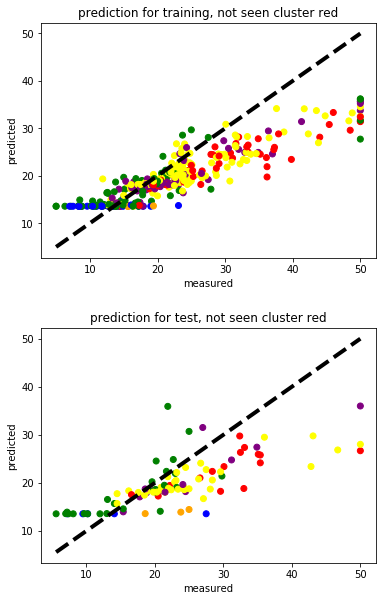

Epoch 1/500
327/327 [==============================] - 3s 8ms/sample - loss: 622.5861
Epoch 2/500
327/327 [==============================] - 0s 298us/sample - loss: 612.4099
Epoch 3/500
327/327 [==============================] - 0s 304us/sample - loss: 590.9161
Epoch 4/500
327/327 [==============================] - 0s 249us/sample - loss: 560.0554
Epoch 5/500
327/327 [==============================] - 0s 264us/sample - loss: 490.1797
Epoch 6/500
327/327 [==============================] - 0s 260us/sample - loss: 388.2768
Epoch 7/500
327/327 [==============================] - 0s 404us/sample - loss: 264.3042s - loss: 246.71
Epoch 8/500
327/327 [==============================] - 0s 244us/sample - loss: 232.3883
Epoch 9/500
327/327 [==============================] - 0s 244us/sample - loss: 197.3779
Epoch 10/500
327/327 [==============================] - 0s 286us/sample - loss: 192.5630
Epoch 11/500
327/327 [==============================] - 0s 290us/sample - loss: 194.0494
Epoch 12/500
327

327/327 [==============================] - 0s 226us/sample - loss: 127.3427
Epoch 183/500
327/327 [==============================] - 0s 256us/sample - loss: 121.3798
Epoch 184/500
327/327 [==============================] - 0s 289us/sample - loss: 119.5355
Epoch 185/500
327/327 [==============================] - 0s 238us/sample - loss: 125.5484
Epoch 186/500
327/327 [==============================] - 0s 259us/sample - loss: 106.3936
Epoch 187/500
327/327 [==============================] - 0s 275us/sample - loss: 119.3819
Epoch 188/500
327/327 [==============================] - 0s 259us/sample - loss: 117.2467
Epoch 189/500
327/327 [==============================] - 0s 263us/sample - loss: 105.6624
Epoch 190/500
327/327 [==============================] - 0s 287us/sample - loss: 111.1970
Epoch 191/500
327/327 [==============================] - 0s 246us/sample - loss: 116.2880
Epoch 192/500
327/327 [==============================] - 0s 298us/sample - loss: 101.5434
Epoch 193/500
327/327 [=

327/327 [==============================] - 0s 78us/sample - loss: 97.3977
Epoch 364/500
327/327 [==============================] - 0s 128us/sample - loss: 98.5589
Epoch 365/500
327/327 [==============================] - 0s 97us/sample - loss: 84.9773
Epoch 366/500
327/327 [==============================] - 0s 145us/sample - loss: 103.6776
Epoch 367/500
327/327 [==============================] - 0s 184us/sample - loss: 89.0120
Epoch 368/500
327/327 [==============================] - 0s 170us/sample - loss: 102.3776
Epoch 369/500
327/327 [==============================] - 0s 225us/sample - loss: 96.0268
Epoch 370/500
327/327 [==============================] - 0s 143us/sample - loss: 92.8023
Epoch 371/500
327/327 [==============================] - 0s 206us/sample - loss: 88.7486
Epoch 372/500
327/327 [==============================] - 0s 190us/sample - loss: 86.0470
Epoch 373/500
327/327 [==============================] - 0s 178us/sample - loss: 91.6250
Epoch 374/500
327/327 [============

327/327 [==============================] - 0s 120us/sample - loss: 96.5831
Epoch 456/500
327/327 [==============================] - 0s 110us/sample - loss: 68.9610
Epoch 457/500
327/327 [==============================] - 0s 146us/sample - loss: 82.0878
Epoch 458/500
327/327 [==============================] - 0s 148us/sample - loss: 85.6679
Epoch 459/500
327/327 [==============================] - 0s 151us/sample - loss: 91.4995
Epoch 460/500
327/327 [==============================] - 0s 173us/sample - loss: 90.0704
Epoch 461/500
327/327 [==============================] - 0s 154us/sample - loss: 93.6773
Epoch 462/500
327/327 [==============================] - 0s 233us/sample - loss: 79.1644
Epoch 463/500
327/327 [==============================] - ETA: 0s - loss: 75.39 - 0s 147us/sample - loss: 81.8143
Epoch 464/500
327/327 [==============================] - 0s 305us/sample - loss: 75.8257
Epoch 465/500
327/327 [==============================] - 0s 141us/sample - loss: 82.2318
Epoch 466/5

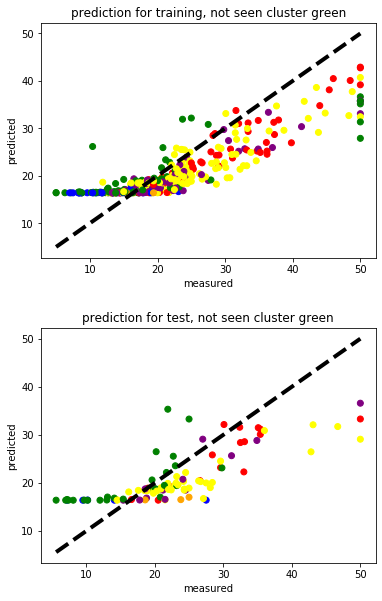

Epoch 1/500
375/375 [==============================] - 2s 7ms/sample - loss: 615.9757
Epoch 2/500
375/375 [==============================] - 0s 252us/sample - loss: 606.5919
Epoch 3/500
375/375 [==============================] - 0s 186us/sample - loss: 590.1737
Epoch 4/500
375/375 [==============================] - 0s 144us/sample - loss: 559.8547
Epoch 5/500
375/375 [==============================] - 0s 139us/sample - loss: 510.6184
Epoch 6/500
375/375 [==============================] - 0s 122us/sample - loss: 425.7288
Epoch 7/500
375/375 [==============================] - 0s 180us/sample - loss: 314.2058
Epoch 8/500
375/375 [==============================] - 0s 217us/sample - loss: 218.9869
Epoch 9/500
375/375 [==============================] - 0s 142us/sample - loss: 248.7951
Epoch 10/500
375/375 [==============================] - 0s 225us/sample - loss: 232.5062
Epoch 11/500
375/375 [==============================] - 0s 274us/sample - loss: 209.8579
Epoch 12/500
375/375 [==========

375/375 [==============================] - 0s 131us/sample - loss: 117.0038
Epoch 185/500
375/375 [==============================] - 0s 117us/sample - loss: 101.0520
Epoch 186/500
375/375 [==============================] - 0s 142us/sample - loss: 109.4026
Epoch 187/500
375/375 [==============================] - 0s 124us/sample - loss: 104.2398
Epoch 188/500
375/375 [==============================] - 0s 155us/sample - loss: 103.2472
Epoch 189/500
375/375 [==============================] - 0s 172us/sample - loss: 90.2416
Epoch 190/500
375/375 [==============================] - 0s 169us/sample - loss: 118.3798
Epoch 191/500
375/375 [==============================] - 0s 128us/sample - loss: 98.2177
Epoch 192/500
375/375 [==============================] - 0s 141us/sample - loss: 110.6470
Epoch 193/500
375/375 [==============================] - 0s 128us/sample - loss: 94.8839
Epoch 194/500
375/375 [==============================] - 0s 189us/sample - loss: 117.6566
Epoch 195/500
375/375 [====

375/375 [==============================] - 0s 137us/sample - loss: 87.2886
Epoch 368/500
375/375 [==============================] - 0s 136us/sample - loss: 94.6422
Epoch 369/500
375/375 [==============================] - 0s 130us/sample - loss: 80.9308
Epoch 370/500
375/375 [==============================] - 0s 132us/sample - loss: 94.0675
Epoch 371/500
375/375 [==============================] - 0s 113us/sample - loss: 86.7068
Epoch 372/500
375/375 [==============================] - 0s 119us/sample - loss: 79.3507
Epoch 373/500
375/375 [==============================] - 0s 140us/sample - loss: 100.1543
Epoch 374/500
375/375 [==============================] - 0s 392us/sample - loss: 88.5075
Epoch 375/500
375/375 [==============================] - 0s 326us/sample - loss: 79.2340
Epoch 376/500
375/375 [==============================] - 0s 273us/sample - loss: 86.6660
Epoch 377/500
375/375 [==============================] - ETA: 0s - loss: 88.83 - 0s 195us/sample - loss: 87.2256
Epoch 378/

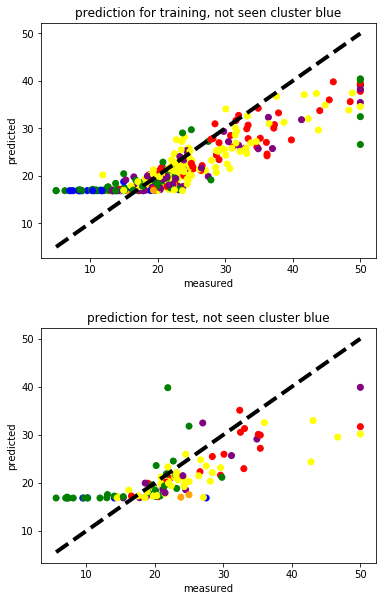

Epoch 1/500
331/331 [==============================] - 2s 7ms/sample - loss: 589.9664
Epoch 2/500
331/331 [==============================] - 0s 220us/sample - loss: 582.7469
Epoch 3/500
331/331 [==============================] - 0s 182us/sample - loss: 571.7279
Epoch 4/500
331/331 [==============================] - 0s 124us/sample - loss: 545.8802
Epoch 5/500
331/331 [==============================] - 0s 113us/sample - loss: 490.9605
Epoch 6/500
331/331 [==============================] - 0s 154us/sample - loss: 390.5054
Epoch 7/500
331/331 [==============================] - 0s 148us/sample - loss: 268.9837
Epoch 8/500
331/331 [==============================] - 0s 164us/sample - loss: 194.1238
Epoch 9/500
331/331 [==============================] - 0s 209us/sample - loss: 203.0729
Epoch 10/500
331/331 [==============================] - 0s 142us/sample - loss: 193.2545
Epoch 11/500
331/331 [==============================] - 0s 147us/sample - loss: 191.5887
Epoch 12/500
331/331 [==========

331/331 [==============================] - 0s 131us/sample - loss: 99.6828
Epoch 185/500
331/331 [==============================] - 0s 157us/sample - loss: 118.4761
Epoch 186/500
331/331 [==============================] - 0s 143us/sample - loss: 108.8857
Epoch 187/500
331/331 [==============================] - 0s 103us/sample - loss: 112.5952
Epoch 188/500
331/331 [==============================] - 0s 106us/sample - loss: 98.5034
Epoch 189/500
331/331 [==============================] - 0s 164us/sample - loss: 106.1953
Epoch 190/500
331/331 [==============================] - 0s 195us/sample - loss: 113.8905
Epoch 191/500
331/331 [==============================] - 0s 149us/sample - loss: 104.1654
Epoch 192/500
331/331 [==============================] - 0s 132us/sample - loss: 113.0433
Epoch 193/500
331/331 [==============================] - 0s 135us/sample - loss: 111.4366
Epoch 194/500
331/331 [==============================] - 0s 127us/sample - loss: 77.0259
Epoch 195/500
331/331 [====

331/331 [==============================] - 0s 186us/sample - loss: 92.2264
Epoch 367/500
331/331 [==============================] - 0s 200us/sample - loss: 79.4212
Epoch 368/500
331/331 [==============================] - 0s 318us/sample - loss: 100.2115
Epoch 369/500
331/331 [==============================] - 0s 234us/sample - loss: 90.7872
Epoch 370/500
331/331 [==============================] - 0s 380us/sample - loss: 79.6309
Epoch 371/500
331/331 [==============================] - 0s 266us/sample - loss: 75.8562
Epoch 372/500
331/331 [==============================] - 0s 324us/sample - loss: 92.8367
Epoch 373/500
331/331 [==============================] - 0s 286us/sample - loss: 87.6543
Epoch 374/500
331/331 [==============================] - 0s 398us/sample - loss: 87.2128
Epoch 375/500
331/331 [==============================] - 0s 277us/sample - loss: 94.7914
Epoch 376/500
331/331 [==============================] - 0s 220us/sample - loss: 91.5217
Epoch 377/500
331/331 [===========

Epoch 458/500
331/331 [==============================] - 0s 163us/sample - loss: 76.2109
Epoch 459/500
331/331 [==============================] - 0s 151us/sample - loss: 83.3128
Epoch 460/500
331/331 [==============================] - 0s 137us/sample - loss: 91.2627
Epoch 461/500
331/331 [==============================] - 0s 223us/sample - loss: 81.0005
Epoch 462/500
331/331 [==============================] - 0s 170us/sample - loss: 89.8283
Epoch 463/500
331/331 [==============================] - 0s 134us/sample - loss: 89.1866
Epoch 464/500
331/331 [==============================] - 0s 243us/sample - loss: 77.0224
Epoch 465/500
331/331 [==============================] - 0s 169us/sample - loss: 63.1037
Epoch 466/500
331/331 [==============================] - 0s 168us/sample - loss: 73.3053
Epoch 467/500
331/331 [==============================] - 0s 172us/sample - loss: 73.4200
Epoch 468/500
331/331 [==============================] - 0s 142us/sample - loss: 75.3187
Epoch 469/500
331/331

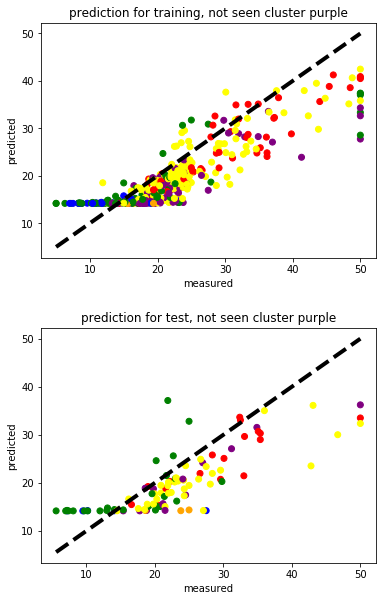

Epoch 1/500
250/250 [==============================] - 3s 11ms/sample - loss: 540.7823
Epoch 2/500
250/250 [==============================] - 0s 219us/sample - loss: 534.6828
Epoch 3/500
250/250 [==============================] - 0s 248us/sample - loss: 524.8826
Epoch 4/500
250/250 [==============================] - 0s 221us/sample - loss: 509.7549
Epoch 5/500
250/250 [==============================] - 0s 195us/sample - loss: 488.4845
Epoch 6/500
250/250 [==============================] - 0s 213us/sample - loss: 461.4070
Epoch 7/500
250/250 [==============================] - 0s 346us/sample - loss: 404.4264
Epoch 8/500
250/250 [==============================] - 0s 289us/sample - loss: 351.3873
Epoch 9/500
250/250 [==============================] - 0s 282us/sample - loss: 298.2562
Epoch 10/500
250/250 [==============================] - 0s 240us/sample - loss: 239.7954
Epoch 11/500
250/250 [==============================] - 0s 234us/sample - loss: 220.1002
Epoch 12/500
250/250 [=========

250/250 [==============================] - 0s 189us/sample - loss: 142.8286
Epoch 184/500
250/250 [==============================] - ETA: 0s - loss: 116.600 - 0s 290us/sample - loss: 109.8073
Epoch 185/500
250/250 [==============================] - 0s 308us/sample - loss: 136.7329
Epoch 186/500
250/250 [==============================] - 0s 287us/sample - loss: 131.6577
Epoch 187/500
250/250 [==============================] - 0s 298us/sample - loss: 111.7629
Epoch 188/500
250/250 [==============================] - 0s 301us/sample - loss: 142.8985
Epoch 189/500
250/250 [==============================] - 0s 216us/sample - loss: 119.9444
Epoch 190/500
250/250 [==============================] - 0s 217us/sample - loss: 117.2030
Epoch 191/500
250/250 [==============================] - 0s 241us/sample - loss: 132.7802
Epoch 192/500
250/250 [==============================] - 0s 253us/sample - loss: 111.3024
Epoch 193/500
250/250 [==============================] - 0s 422us/sample - loss: 135.163

Epoch 274/500
250/250 [==============================] - 0s 157us/sample - loss: 115.0113
Epoch 275/500
250/250 [==============================] - 0s 125us/sample - loss: 106.5423
Epoch 276/500
250/250 [==============================] - 0s 181us/sample - loss: 94.9378
Epoch 277/500
250/250 [==============================] - 0s 148us/sample - loss: 102.3985
Epoch 278/500
250/250 [==============================] - 0s 216us/sample - loss: 108.0012
Epoch 279/500
250/250 [==============================] - 0s 239us/sample - loss: 98.9113
Epoch 280/500
250/250 [==============================] - 0s 242us/sample - loss: 121.3392
Epoch 281/500
250/250 [==============================] - ETA: 0s - loss: 117.904 - 0s 214us/sample - loss: 114.6709
Epoch 282/500
250/250 [==============================] - 0s 199us/sample - loss: 98.8993
Epoch 283/500
250/250 [==============================] - 0s 226us/sample - loss: 96.0459
Epoch 284/500
250/250 [==============================] - 0s 207us/sample - los

250/250 [==============================] - 0s 141us/sample - loss: 85.9978
Epoch 366/500
250/250 [==============================] - 0s 137us/sample - loss: 99.5979
Epoch 367/500
250/250 [==============================] - 0s 142us/sample - loss: 92.2794
Epoch 368/500
250/250 [==============================] - 0s 121us/sample - loss: 110.0424
Epoch 369/500
250/250 [==============================] - 0s 126us/sample - loss: 84.4123
Epoch 370/500
250/250 [==============================] - 0s 114us/sample - loss: 104.4005
Epoch 371/500
250/250 [==============================] - 0s 117us/sample - loss: 78.6979
Epoch 372/500
250/250 [==============================] - 0s 130us/sample - loss: 79.5932
Epoch 373/500
250/250 [==============================] - 0s 140us/sample - loss: 90.2853
Epoch 374/500
250/250 [==============================] - 0s 137us/sample - loss: 105.4143
Epoch 375/500
250/250 [==============================] - 0s 140us/sample - loss: 93.1400
Epoch 376/500
250/250 [=========

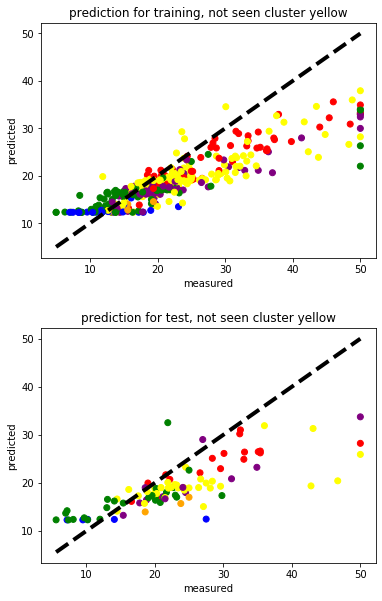

Epoch 1/500
396/396 [==============================] - 3s 8ms/sample - loss: 590.1353
Epoch 2/500
396/396 [==============================] - 0s 235us/sample - loss: 579.3703
Epoch 3/500
396/396 [==============================] - 0s 237us/sample - loss: 556.6739
Epoch 4/500
396/396 [==============================] - 0s 269us/sample - loss: 512.7178
Epoch 5/500
396/396 [==============================] - 0s 280us/sample - loss: 429.1681
Epoch 6/500
396/396 [==============================] - 0s 235us/sample - loss: 279.2644
Epoch 7/500
396/396 [==============================] - 0s 219us/sample - loss: 208.7724
Epoch 8/500
396/396 [==============================] - 0s 213us/sample - loss: 194.9892
Epoch 9/500
396/396 [==============================] - 0s 294us/sample - loss: 191.7306
Epoch 10/500
396/396 [==============================] - 0s 204us/sample - loss: 199.2743
Epoch 11/500
396/396 [==============================] - 0s 208us/sample - loss: 186.5905
Epoch 12/500
396/396 [==========

396/396 [==============================] - 0s 141us/sample - loss: 107.6933
Epoch 185/500
396/396 [==============================] - 0s 131us/sample - loss: 106.7068
Epoch 186/500
396/396 [==============================] - 0s 153us/sample - loss: 109.4336
Epoch 187/500
396/396 [==============================] - 0s 130us/sample - loss: 117.9261
Epoch 188/500
396/396 [==============================] - 0s 132us/sample - loss: 112.3338
Epoch 189/500
396/396 [==============================] - 0s 154us/sample - loss: 113.9992
Epoch 190/500
396/396 [==============================] - 0s 129us/sample - loss: 108.2262
Epoch 191/500
396/396 [==============================] - 0s 172us/sample - loss: 105.4136
Epoch 192/500
396/396 [==============================] - 0s 164us/sample - loss: 103.8568
Epoch 193/500
396/396 [==============================] - 0s 159us/sample - loss: 93.1876
Epoch 194/500
396/396 [==============================] - 0s 127us/sample - loss: 107.0490
Epoch 195/500
396/396 [==

396/396 [==============================] - 0s 168us/sample - loss: 97.5445
Epoch 368/500
396/396 [==============================] - 0s 130us/sample - loss: 81.9579
Epoch 369/500
396/396 [==============================] - 0s 184us/sample - loss: 83.7442
Epoch 370/500
396/396 [==============================] - 0s 150us/sample - loss: 90.1608
Epoch 371/500
396/396 [==============================] - 0s 139us/sample - loss: 80.2753
Epoch 372/500
396/396 [==============================] - 0s 131us/sample - loss: 92.3234
Epoch 373/500
396/396 [==============================] - 0s 136us/sample - loss: 78.9178
Epoch 374/500
396/396 [==============================] - 0s 141us/sample - loss: 85.1138
Epoch 375/500
396/396 [==============================] - 0s 166us/sample - loss: 83.5790
Epoch 376/500
396/396 [==============================] - 0s 148us/sample - loss: 73.9827
Epoch 377/500
396/396 [==============================] - 0s 142us/sample - loss: 87.9658
Epoch 378/500
396/396 [============

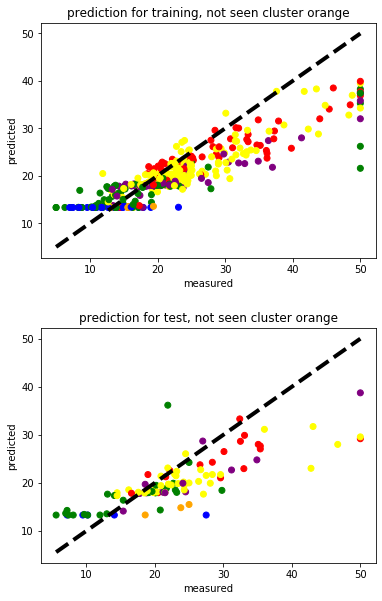

In [114]:
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'orange']

for i in range(0,6,1):
    train_x_mod = np.delete(train_x, np.where((cluster_train == i))[0], axis = 0)
    train_y_mod = np.delete(train_y, np.where((cluster_train == i))[0], axis = 0)
    cluster_train_mod = np.delete(cluster_train, np.where((cluster_train == i))[0], axis = 0)
    
    model_mc = keras.Sequential([
    keras.layers.Dense(13, input_dim=13, kernel_initializer='normal', activation='sigmoid'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(26),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(13),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(9),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(6),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3),
    keras.layers.Dropout(0.2),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(1, kernel_initializer='normal')
    ])

    model_mc.compile(loss='mean_squared_error', optimizer='adam')
    
    history = model_mc.fit(train_x_mod, train_y_mod, epochs = 500)
    
    # with the unseen points during training
    pred_test = model_mc.predict(train_x)
    pred = model_mc.predict(test_x)
    sme = ((test_y-pred)**2).mean()
    print("sme on test set: ", sme)

    plt.subplots_adjust(hspace = 0.3, top = 2)
    plt.subplot(2, 1, 1)
    t = 'prediction for training, not seen cluster ' + colors[i]
    #fig, ax = plt.subplots()
    plt.scatter(train_y, pred_test, c = cluster_train, cmap=matplotlib.colors.ListedColormap(colors))
    plt.plot([train_y.min(), train_y.max()], [train_y.min(), train_y.max()], 'k--', lw=4)
    plt.xlabel('measured')
    plt.ylabel('predicted')
    plt.title(t)
    
    # check the test dataset
    plt.subplot(2, 1, 2)
    t = 'prediction for test, not seen cluster ' + colors[i]
    #fig, ax = plt.subplots()
    plt.scatter(test_y, pred, c = cluster_test, cmap=matplotlib.colors.ListedColormap(colors))
    plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
    plt.xlabel('measured')
    plt.ylabel('predicted')
    plt.title(t)
    
    
    plt.show()        

###### make exclusion based on the target variable

## exclude high values = expensive houses

(array([ 15.,  48.,  72., 120.,  64.,  31.,  21.,   8.,   8.,  17.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

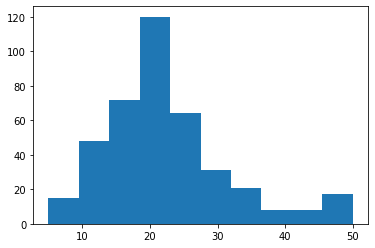

In [145]:
plt.hist(train_y)

In [17]:
threshhold = np.percentile(train_y, 90) #34.67
print(threshhold)

34.67


In [18]:
train_x_mod = np.delete(train_x, np.where((train_y > threshhold))[0], axis = 0)
train_y_mod = np.delete(train_y, np.where((train_y > threshhold))[0], axis = 0)

In [270]:
train_y_mod.shape

(363,)

In [19]:
train_mod_class = train_y > threshhold
#print(train_mod_class)

In [186]:
# create a baseline NN
model_nn2 = keras.Sequential([
    keras.layers.Dense(13, input_dim=13, kernel_initializer='normal', activation='sigmoid'),
    keras.layers.Dense(26),
    keras.layers.Dense(13),
    keras.layers.Dense(9),
    keras.layers.Dense(6),
    keras.layers.Dense(3),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(1, kernel_initializer='normal')
])

model_nn2.compile(loss='mean_squared_error', optimizer='adam')

history = model_nn2.fit(train_x_mod, train_y_mod, epochs = 500)

Epoch 1/500
363/363 [==============================] - 12s 32ms/sample - loss: 436.7840
Epoch 2/500
363/363 [==============================] - 0s 251us/sample - loss: 422.9510
Epoch 3/500
363/363 [==============================] - 0s 275us/sample - loss: 397.5938
Epoch 4/500
363/363 [==============================] - 0s 283us/sample - loss: 356.0689
Epoch 5/500
363/363 [==============================] - 0s 290us/sample - loss: 283.0836
Epoch 6/500
363/363 [==============================] - 0s 386us/sample - loss: 161.7180
Epoch 7/500
363/363 [==============================] - 0s 415us/sample - loss: 51.3211
Epoch 8/500
363/363 [==============================] - 0s 315us/sample - loss: 40.0056
Epoch 9/500
363/363 [==============================] - 0s 724us/sample - loss: 33.0835
Epoch 10/500
363/363 [==============================] - 0s 369us/sample - loss: 32.1638
Epoch 11/500
363/363 [==============================] - 0s 356us/sample - loss: 29.3555
Epoch 12/500
363/363 [=============

363/363 [==============================] - 0s 189us/sample - loss: 10.1847
Epoch 95/500
363/363 [==============================] - 0s 184us/sample - loss: 9.7015
Epoch 96/500
363/363 [==============================] - 0s 231us/sample - loss: 9.7893
Epoch 97/500
363/363 [==============================] - 0s 203us/sample - loss: 9.8877
Epoch 98/500
363/363 [==============================] - 0s 194us/sample - loss: 10.0627
Epoch 99/500
363/363 [==============================] - 0s 214us/sample - loss: 9.8686
Epoch 100/500
363/363 [==============================] - 0s 176us/sample - loss: 9.5052
Epoch 101/500
363/363 [==============================] - 0s 133us/sample - loss: 9.3580
Epoch 102/500
363/363 [==============================] - 0s 193us/sample - loss: 9.4125
Epoch 103/500
363/363 [==============================] - 0s 186us/sample - loss: 10.1395
Epoch 104/500
363/363 [==============================] - 0s 199us/sample - loss: 11.2692
Epoch 105/500
363/363 [========================

363/363 [==============================] - 0s 267us/sample - loss: 8.6806
Epoch 280/500
363/363 [==============================] - 0s 194us/sample - loss: 8.2936
Epoch 281/500
363/363 [==============================] - 0s 149us/sample - loss: 8.3637
Epoch 282/500
363/363 [==============================] - 0s 245us/sample - loss: 8.5164
Epoch 283/500
363/363 [==============================] - 0s 236us/sample - loss: 8.6393
Epoch 284/500
363/363 [==============================] - 0s 266us/sample - loss: 8.5290
Epoch 285/500
363/363 [==============================] - 0s 243us/sample - loss: 8.2545
Epoch 286/500
363/363 [==============================] - 0s 214us/sample - loss: 8.3264
Epoch 287/500
363/363 [==============================] - 0s 240us/sample - loss: 7.9611
Epoch 288/500
363/363 [==============================] - 0s 246us/sample - loss: 9.5566
Epoch 289/500
363/363 [==============================] - 0s 270us/sample - loss: 8.2933
Epoch 290/500
363/363 [=======================

Epoch 372/500
363/363 [==============================] - 0s 188us/sample - loss: 8.0717
Epoch 373/500
363/363 [==============================] - 0s 203us/sample - loss: 8.1853
Epoch 374/500
363/363 [==============================] - 0s 190us/sample - loss: 8.3201
Epoch 375/500
363/363 [==============================] - 0s 182us/sample - loss: 7.9593
Epoch 376/500
363/363 [==============================] - 0s 235us/sample - loss: 8.0014
Epoch 377/500
363/363 [==============================] - 0s 204us/sample - loss: 8.3131
Epoch 378/500
363/363 [==============================] - 0s 210us/sample - loss: 7.9379
Epoch 379/500
363/363 [==============================] - 0s 238us/sample - loss: 8.0654
Epoch 380/500
363/363 [==============================] - 0s 432us/sample - loss: 8.3493
Epoch 381/500
363/363 [==============================] - 0s 362us/sample - loss: 8.2310
Epoch 382/500
363/363 [==============================] - 0s 332us/sample - loss: 8.1367
Epoch 383/500
363/363 [=========

In [187]:
model_nn2.save('A_101_baseline2.h5')

In [20]:
model_nn2 = tf.keras.models.load_model('A_101_baseline2.h5')

In [273]:
model_mc2 = keras.Sequential([
    keras.layers.Dense(13, input_dim=13, kernel_initializer='normal', activation='sigmoid'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(26),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(13),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(9),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(6),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3),
    keras.layers.Dropout(0.2),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(1, kernel_initializer='normal')
])

model_mc2.compile(loss='mean_squared_error', optimizer='adam')

In [178]:
history = model_mc2.fit(train_x_mod, train_y_mod, epochs = 500)

Epoch 1/500
363/363 [==============================] - 15s 40ms/sample - loss: 428.8675
Epoch 2/500
363/363 [==============================] - 0s 544us/sample - loss: 416.5757
Epoch 3/500
363/363 [==============================] - 0s 430us/sample - loss: 396.3017
Epoch 4/500
363/363 [==============================] - 0s 609us/sample - loss: 359.6501
Epoch 5/500
363/363 [==============================] - 0s 669us/sample - loss: 300.6850
Epoch 6/500
363/363 [==============================] - 0s 476us/sample - loss: 214.1984
Epoch 7/500
363/363 [==============================] - 0s 703us/sample - loss: 150.3873
Epoch 8/500
363/363 [==============================] - 0s 717us/sample - loss: 146.3778
Epoch 9/500
363/363 [==============================] - 0s 1ms/sample - loss: 119.5740
Epoch 10/500
363/363 [==============================] - 0s 747us/sample - loss: 137.9416
Epoch 11/500
363/363 [==============================] - 0s 521us/sample - loss: 100.0808
Epoch 12/500
363/363 [==========

363/363 [==============================] - 0s 246us/sample - loss: 72.3770
Epoch 185/500
363/363 [==============================] - 0s 372us/sample - loss: 74.0880
Epoch 186/500
363/363 [==============================] - 0s 280us/sample - loss: 74.6076
Epoch 187/500
363/363 [==============================] - 0s 318us/sample - loss: 65.4693
Epoch 188/500
363/363 [==============================] - 0s 284us/sample - loss: 76.4970
Epoch 189/500
363/363 [==============================] - 0s 324us/sample - loss: 56.9547
Epoch 190/500
363/363 [==============================] - 0s 275us/sample - loss: 61.9370
Epoch 191/500
363/363 [==============================] - 0s 293us/sample - loss: 65.3970
Epoch 192/500
363/363 [==============================] - 0s 507us/sample - loss: 75.6266s - loss: 75.41
Epoch 193/500
363/363 [==============================] - 0s 383us/sample - loss: 68.4453
Epoch 194/500
363/363 [==============================] - 0s 516us/sample - loss: 66.9728
Epoch 195/500
363/36

Epoch 367/500
363/363 [==============================] - 0s 257us/sample - loss: 62.6154
Epoch 368/500
363/363 [==============================] - 0s 259us/sample - loss: 53.5229
Epoch 369/500
363/363 [==============================] - 0s 293us/sample - loss: 51.5764
Epoch 370/500
363/363 [==============================] - 0s 272us/sample - loss: 54.9354
Epoch 371/500
363/363 [==============================] - 0s 260us/sample - loss: 47.5588
Epoch 372/500
363/363 [==============================] - 0s 308us/sample - loss: 45.9299
Epoch 373/500
363/363 [==============================] - 0s 257us/sample - loss: 50.9887
Epoch 374/500
363/363 [==============================] - 0s 360us/sample - loss: 52.2104
Epoch 375/500
363/363 [==============================] - 0s 314us/sample - loss: 58.1296
Epoch 376/500
363/363 [==============================] - 0s 277us/sample - loss: 55.6437
Epoch 377/500
363/363 [==============================] - 0s 298us/sample - loss: 45.3220
Epoch 378/500
363/363

363/363 [==============================] - 0s 364us/sample - loss: 49.4397
Epoch 460/500
363/363 [==============================] - 0s 371us/sample - loss: 49.7495
Epoch 461/500
363/363 [==============================] - 0s 283us/sample - loss: 48.3925
Epoch 462/500
363/363 [==============================] - 0s 342us/sample - loss: 43.2587
Epoch 463/500
363/363 [==============================] - 0s 308us/sample - loss: 47.0630
Epoch 464/500
363/363 [==============================] - 0s 400us/sample - loss: 55.4608
Epoch 465/500
363/363 [==============================] - 0s 278us/sample - loss: 48.5628
Epoch 466/500
363/363 [==============================] - 0s 294us/sample - loss: 50.0759
Epoch 467/500
363/363 [==============================] - 0s 275us/sample - loss: 45.3019
Epoch 468/500
363/363 [==============================] - 0s 316us/sample - loss: 43.3033
Epoch 469/500
363/363 [==============================] - 0s 269us/sample - loss: 46.3335
Epoch 470/500
363/363 [============

In [179]:
model_mc2.save('A_101_mc2.h5')

In [21]:
model_mc2 = tf.keras.models.load_model('A_101_mc2.h5')

In [22]:
# check the training and the unseen data points
pred_base = model_nn2.predict(train_x)
pred_mc2 = model_mc2.predict(train_x)

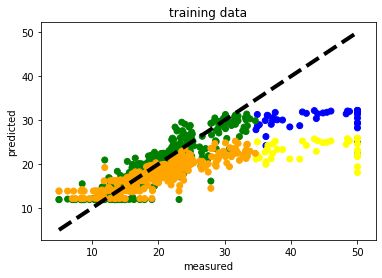

In [23]:
colors_base = ['green', 'blue']
colors_mc2 = ['orange', 'yellow']
fig, ax = plt.subplots()
ax.scatter(train_y, pred_base, c = train_mod_class, cmap=matplotlib.colors.ListedColormap(colors_base))
ax.scatter(train_y, pred_mc2, c = train_mod_class, cmap=matplotlib.colors.ListedColormap(colors_mc2))
ax.plot([train_y.min(), train_y.max()], [train_y.min(), train_y.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
ax.set_title('training data')

plt.show()

In [24]:
test_mod_class = test_y > threshhold

In [25]:
# check the test and the unseen data points
pred_base = model_nn2.predict(test_x)
pred_mc2 = model_mc2.predict(test_x)

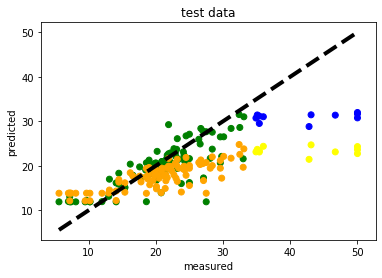

In [26]:
colors_base = ['green', 'blue']
colors_mc2 = ['orange', 'yellow']
fig, ax = plt.subplots()
ax.scatter(test_y, pred_base, c = test_mod_class, cmap=matplotlib.colors.ListedColormap(colors_base))
ax.scatter(test_y, pred_mc2, c = test_mod_class, cmap=matplotlib.colors.ListedColormap(colors_mc2))
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
ax.set_title('test data')

plt.show()

## test a prediction method with uncertainty

In [27]:
import tensorflow.keras.backend as K
model_mc2_pred = K.function([model_mc2.input, K.learning_phase()], [model_mc2.output])

In [28]:
# set n for number of iterations:
n = 100
x = np.array(model_mc2_pred([test_x, 1]))
for i in range(1, n, 1):
    y = np.array(model_mc2_pred([test_x, 1]))
    x = np.concatenate([x,y], axis = 0)
    #print(x)
pred_mean = x.mean(axis = 0)
pred_var = x.var(axis = 0)

# The variance is the average of the squared deviations from the mean, i.e., var = mean(abs(x - x.mean())**2).

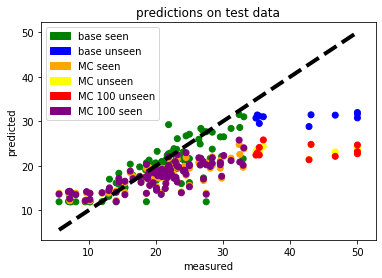

In [40]:
import matplotlib.patches as mpatches
colors_base = ['green', 'blue']
colors_mc2 = ['orange', 'yellow']
colors_mc2_pred = ['purple', 'red']
fig, ax = plt.subplots()
ax.scatter(test_y, pred_base, c = test_mod_class, label='base', cmap=matplotlib.colors.ListedColormap(colors_base))
ax.scatter(test_y, pred_mc2, c = test_mod_class, label='MC', cmap=matplotlib.colors.ListedColormap(colors_mc2))
ax.scatter(test_y, pred_mean, c = test_mod_class, label='MC 100', cmap=matplotlib.colors.ListedColormap(colors_mc2_pred))
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
ax.set_title ('predictions on test data')
#ax.legend((pred_base, pred_mc2, pred_mean), ('baseline', 'MC', 'MC avg of 100'), loc = 'upper right', )
#ax.legend(loc='upper left')

green_patch = mpatches.Patch(color='green', label='base seen')
blue_patch = mpatches.Patch(color='blue', label='base unseen')
orange_patch = mpatches.Patch(color='orange', label='MC seen')
yellow_patch = mpatches.Patch(color='yellow', label='MC unseen')
purple_patch = mpatches.Patch(color='purple', label='MC 100 seen')
red_patch = mpatches.Patch(color='red', label='MC 100 unseen')
#purple_patch = mpatches.Circle(color='purple', label='MC 100')
plt.legend(handles=[green_patch, blue_patch, orange_patch, yellow_patch, red_patch, purple_patch])

plt.show()

In [83]:
test_y_exp = np.expand_dims(test_y, axis = 1)
alles = np.concatenate([test_y_exp, pred_base, pred_mc2, pred_mean, pred_var], axis = 1)

In [93]:
# sort the arrays by the variance from the mc predict
alles_sorted = alles[alles[:,0].argsort()]

In [94]:
#alles = pd.DataFrame(alles_sorted)
#alles.head(20)

In [95]:
n = len(alles_sorted)
base = []
mc = []
mc2 = []
for i in range(20, n, 20):
    data = alles_sorted[0:i]
    data = pd.DataFrame(data)
    mse_b = ((data[0] - data[1])**2).mean()
    base.append(mse_b)
    mse_mc2 = ((data[0] - data[3])**2).mean()
    mc2.append(mse_mc2)
    mse_mc = ((data[0] - data[2])**2).mean()
    mc.append(mse_mc)

In [96]:
base

[11.619016901470046,
 9.406208763569763,
 7.890679061907723,
 13.369650643207688,
 24.561969369293525]

In [88]:
mc2

[15.919571950048617,
 12.426608955282262,
 13.351966337289069,
 22.12014839332943,
 56.15331432306899]

In [89]:
mc

[16.321122619351424,
 12.550459473444933,
 13.054809267395093,
 21.792380730482833,
 55.515635861072276]

In [90]:
mc[::-1]

[55.515635861072276,
 21.792380730482833,
 13.054809267395093,
 12.550459473444933,
 16.321122619351424]

Text(0.5, 1.0, 'MSE for test data')

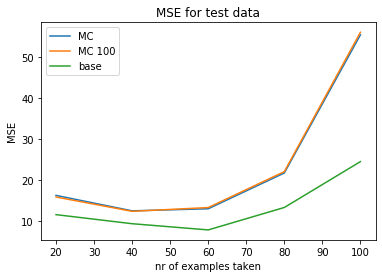

In [91]:
x = [20, 40, 60, 80, 100]
plt.plot(x, mc, label = 'MC')
plt.plot(x, mc2, label = 'MC 100')
plt.plot(x, base, label = 'base')
plt.legend(loc='upper left')
plt.xlabel('nr of examples taken')
plt.ylabel('MSE')
plt.title('MSE for test data')